In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")


In [3]:
combined_data = pd.concat([train_data, test_data], axis=0)

In [14]:
combined_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
combined_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

In [5]:
combined_data['is_fraud'].value_counts()

0.0    19432
1.0       70
Name: is_fraud, dtype: int64

In [6]:
legit = combined_data[combined_data.is_fraud == 0.0]
fraud = combined_data[combined_data.is_fraud == 1.0]

In [7]:
print(legit.shape)
print(fraud.shape)

(19432, 23)
(70, 23)


In [15]:
legit.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
fraud.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
legit_sample = legit.sample(n=70)

In [10]:
print(legit_sample.shape)
print(fraud.shape)

(70, 23)
(70, 23)


In [11]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [12]:
new_dataset['is_fraud'].value_counts()

0.0    70
1.0    70
Name: is_fraud, dtype: int64

In [13]:
X = new_dataset[["Unnamed: 0","amt","zip","lat","city_pop","merch_lat"]]
y = new_dataset["is_fraud"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [18]:
y_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
print(training_accuracy)

0.8214285714285714


In [19]:
y_test_pred=model.predict(X_test)
testing_accuracy=accuracy_score(y_test_pred,y_test)
print(testing_accuracy)

0.6785714285714286


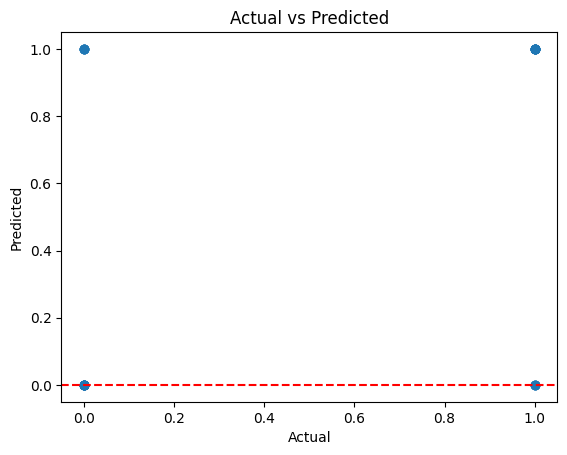

In [20]:
plt.scatter(y_test_pred,y_test)
plt.axhline(y=0,color='red',linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
